### Activity 5
### 63010026 กฤตศยา นทีมณฑล
### 63010339 ณัฐวดี ติณภูมิ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import model_selection
import pandas_datareader.data as web

In [2]:
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']
stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [3]:
stk_data

Attributes   Adj Close                               Close              \
Symbols           MSFT         IBM       GOOGL        MSFT         IBM   
Date                                                                     
2017-10-09   71.685867  111.087791   49.615501   76.290001  140.908218   
2017-10-10   71.685867  111.924400   49.389999   76.290001  141.969406   
2017-10-11   71.808014  111.261162   50.282501   76.419998  141.128113   
2017-10-12   72.465813  110.816437   50.282501   77.120003  140.564056   
2017-10-13   72.813454  110.869209   50.393501   77.489998  140.630981   
...                ...         ...         ...         ...         ...   
2022-10-03  240.740005  121.510002   98.639999  240.740005  121.510002   
2022-10-04  248.880005  125.500000  101.639999  248.880005  125.500000   
2022-10-05  249.199997  125.739998  101.430000  249.199997  125.739998   
2022-10-06  246.789993  122.230003  101.419998  246.789993  122.230003   
2022-10-07  234.240005  118.820000   98.680000  234.240005  118.820000   

Attributes                    High                                 Low  \
Symbols          GOOGL        MSFT         IBM       GOOGL        MSFT   
Date                                                                     
2017-10-09   49.615501   76.550003  141.290634   50.022999   75.860001   
2017-10-10   49.389999   76.629997  142.399612   49.873501   76.139999   
2017-10-11   50.282501   76.459999  141.940720   50.378502   75.949997   
2017-10-12   50.282501   77.290001  141.386230   50.577000   76.370003   
2017-10-13   50.393501   77.870003  141.347992   50.737999   77.290001   
...                ...         ...         ...         ...         ...   
2022-10-03   98.639999  241.610001  122.209999   99.290001  234.660004   
2022-10-04  101.639999  250.360001  125.650002  101.839996  244.979996   
2022-10-05  101.430000  250.580002  126.459999  101.930000  244.100006   
2022-10-06  101.419998  250.339996  125.300003  102.930000  246.080002   
2022-10-07   98.680000  241.320007  121.800003  100.529999  233.169998   

Attributes                                Open                          \
Symbols            IBM       GOOGL        MSFT         IBM       GOOGL   
Date                                                                     
2017-10-09  139.913956   49.575001   75.970001  140.057358   49.750000   
2017-10-10  141.156784   49.055500   76.330002  141.214142   49.764999   
2017-10-11  140.803055   49.396999   76.360001  141.873810   49.452000   
2017-10-12  140.315491   50.055000   76.489998  141.070740   50.192001   
2017-10-13  140.478012   50.353001   77.589996  140.994263   50.455502   
...                ...         ...         ...         ...         ...   
2022-10-03  119.599998   96.519997  235.410004  120.160004   96.760002   
2022-10-04  122.519997  100.379997  245.089996  122.800003  100.440002   
2022-10-05  124.230003   98.800003  245.990005  124.709999   99.830002   
2022-10-06  121.769997  100.589996  247.929993  124.879997  100.680000   
2022-10-07  118.070000   98.300003  240.899994  121.500000   99.849998   

Attributes      Volume                         
Symbols           MSFT        IBM       GOOGL  
Date                                           
2017-10-09  11386500.0  2806000.0  25910000.0  
2017-10-10  13944500.0  4218100.0  23268000.0  
2017-10-11  15388900.0  3872501.0  36300000.0  
2017-10-12  16876500.0  3414458.0  30614000.0  
2017-10-13  15335700.0  2621904.0  26552000.0  
...                ...        ...         ...  
2022-10-03  28880400.0  4261700.0  27982000.0  
2022-10-04  34888400.0  4566100.0  28850800.0  
2022-10-05  20347100.0  3212900.0  22176900.0  
2022-10-06  20239900.0  5074600.0  22324000.0  
2022-10-07  37732400.0  4498200.0  27481800.0  

[1259 rows x 18 columns]

In [4]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2017-10-09,NaN,NaN
2017-10-10,112.15,1.3215
2017-10-11,112.35,1.3210
2017-10-12,112.38,1.3174
2017-10-13,111.94,1.3304
...,...,...
2022-09-26,144.45,1.0703
2022-09-27,144.71,1.0753
2022-09-28,144.15,1.0832


In [5]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2017-10-09,2544.73,22761.07,10.33
2017-10-10,2550.64,22830.68,10.08
2017-10-11,2555.24,22872.89,9.85
2017-10-12,2550.93,22841.01,9.91
2017-10-13,2553.17,22871.72,9.61
...,...,...,...
2022-10-03,3678.43,29490.89,30.10
2022-10-04,3790.93,30316.32,29.07
2022-10-05,3783.28,30273.87,28.55


## Get Data

### Select Columns

In [6]:
base = stk_data.loc[:, ('Adj Close', 'MSFT')]
X1 = stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]
X2 = ccy_data
X3 = idx_data

In [7]:
print(base)

Date
2017-10-09     71.685867
2017-10-10     71.685867
2017-10-11     71.808014
2017-10-12     72.465813
2017-10-13     72.813454
                 ...    
2022-10-03    240.740005
2022-10-04    248.880005
2022-10-05    249.199997
2022-10-06    246.789993
2022-10-07    234.240005
Name: (Adj Close, MSFT), Length: 1259, dtype: float64


In [8]:
X1

Attributes   Adj Close            
Symbols          GOOGL         IBM
Date                              
2017-10-09   49.615501  111.087791
2017-10-10   49.389999  111.924400
2017-10-11   50.282501  111.261162
2017-10-12   50.282501  110.816437
2017-10-13   50.393501  110.869209
...                ...         ...
2022-10-03   98.639999  121.510002
2022-10-04  101.639999  125.500000
2022-10-05  101.430000  125.739998
2022-10-06  101.419998  122.230003
2022-10-07   98.680000  118.820000

[1259 rows x 2 columns]

In [9]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-10-09,NaN,NaN
2017-10-10,112.15,1.3215
2017-10-11,112.35,1.3210
2017-10-12,112.38,1.3174
2017-10-13,111.94,1.3304
...,...,...
2022-09-26,144.45,1.0703
2022-09-27,144.71,1.0753
2022-09-28,144.15,1.0832


In [10]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-10-09,2544.73,22761.07,10.33
2017-10-10,2550.64,22830.68,10.08
2017-10-11,2555.24,22872.89,9.85
2017-10-12,2550.93,22841.01,9.91
2017-10-13,2553.17,22871.72,9.61
...,...,...,...
2022-10-03,3678.43,29490.89,30.10
2022-10-04,3790.93,30316.32,29.07
2022-10-05,3783.28,30273.87,28.55


In [11]:
X1.describe()

Attributes    Adj Close             
Symbols           GOOGL          IBM
count       1259.000000  1259.000000
mean          83.743026   115.572879
std           31.449437    10.845770
min           49.233501    79.847008
25%           57.342251   109.084690
50%           70.337502   114.274101
75%          112.673748   124.264233
max          149.838501   141.102219

In [12]:
X2.describe()

,DEXJPUS,DEXUSUK
count,1242.000000,1242.000000
mean,112.112488,1.309215
std,8.207207,0.061567
min,102.520000,1.070300
25%,107.700000,1.270600
50%,109.810000,1.310400
75%,112.845000,1.356200
max,144.710000,1.433200


In [13]:
X3.describe()

,SP500,DJIA,VIXCLS
count,1259.000000,1259.000000,1262.000000
mean,3391.958745,28641.883900,20.674596
std,684.232680,4086.757841,8.676188
min,2237.400000,18591.930000,9.140000
25%,2801.010000,25343.880000,14.772500
50%,3135.960000,27198.020000,18.875000
75%,4018.845000,32645.890000,24.720000
max,4796.560000,36799.650000,82.690000


In [14]:
X1.fillna(0)
X2.fillna(0)
X3.fillna(0)

,SP500,DJIA,VIXCLS
DATE,,,
2017-10-09,2544.73,22761.07,10.33
2017-10-10,2550.64,22830.68,10.08
2017-10-11,2555.24,22872.89,9.85
2017-10-12,2550.93,22841.01,9.91
2017-10-13,2553.17,22871.72,9.61
...,...,...,...
2022-10-03,3678.43,29490.89,30.10
2022-10-04,3790.93,30316.32,29.07
2022-10-05,3783.28,30273.87,28.55


## Standardized Data

In [15]:
scaler = preprocessing.StandardScaler()
X1 = pd.DataFrame(scaler.fit_transform(X1.values),index = X1.index,columns=X1.columns)
X2 = pd.DataFrame(scaler.fit_transform(X2.values),index = X2.index,columns=X2.columns)
X3 = pd.DataFrame(scaler.fit_transform(X3.values),index = X3.index,columns=X3.columns)

In [16]:
X1

Attributes Adj Close          
Symbols        GOOGL       IBM
Date                          
2017-10-09 -1.085587 -0.413698
2017-10-10 -1.092760 -0.336530
2017-10-11 -1.064369 -0.397706
2017-10-12 -1.064369 -0.438727
2017-10-13 -1.060839 -0.433859
...              ...       ...
2022-10-03  0.473868  0.547631
2022-10-04  0.569297  0.915663
2022-10-05  0.562617  0.937800
2022-10-06  0.562299  0.614043
2022-10-07  0.475141  0.299510

[1259 rows x 2 columns]

In [17]:
X2

,DEXJPUS,DEXUSUK
DATE,,
2017-10-09,NaN,NaN
2017-10-10,0.004572,0.199625
2017-10-11,0.028951,0.191501
2017-10-12,0.032608,0.133005
2017-10-13,-0.021025,0.344241
...,...,...
2022-09-26,3.941723,-3.882112
2022-09-27,3.973415,-3.800867
2022-09-28,3.905155,-3.672500


In [18]:
X3

,SP500,DJIA,VIXCLS
DATE,,,
2017-10-09,-1.238709,-1.439564,-1.192770
2017-10-10,-1.230068,-1.422524,-1.221596
2017-10-11,-1.223343,-1.412192,-1.248116
2017-10-12,-1.229644,-1.419996,-1.241198
2017-10-13,-1.226369,-1.412478,-1.275789
...,...,...,...
2022-10-03,0.418842,0.207828,1.086784
2022-10-04,0.583325,0.409885,0.968021
2022-10-05,0.572140,0.399494,0.908063


### Calculate

In [19]:
return_period = 1
Y = base.shift(-return_period)
X4_3DT = base.diff(3*return_period).shift(-3*return_period)
X4_6DT = base.diff(6*return_period).shift(-6*return_period)
X4_12DT = base.diff(12*return_period).shift(-12*return_period)
X4 = pd.concat([X4_3DT, X4_6DT, X4_12DT], axis=1)
X4.columns = ['MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4 = pd.DataFrame(scaler.fit_transform(X4.values), index = X4.index,columns=X4.columns)

In [20]:
Y

Date
2017-10-09     71.685867
2017-10-10     71.808014
2017-10-11     72.465813
2017-10-12     72.813454
2017-10-13     72.963799
                 ...    
2022-10-03    248.880005
2022-10-04    249.199997
2022-10-05    246.789993
2022-10-06    234.240005
2022-10-07           NaN
Name: (Adj Close, MSFT), Length: 1259, dtype: float64

In [21]:
X4

,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,
2017-10-09,0.064209,0.051400,0.053825
2017-10-10,0.124559,0.053767,0.065021
2017-10-11,0.129454,0.073892,0.488648
2017-10-12,0.005474,0.097559,0.435261
2017-10-13,-0.051614,0.056135,0.342271
...,...,...,...
2022-10-03,0.979076,NaN,NaN
2022-10-04,-2.612656,NaN,NaN
2022-10-05,NaN,NaN,NaN


### Forming Dataset

In [22]:
#X = เอา X มารวมกันทั้งหมด
#dataset = เอา X,Y มารวมกัน
X = pd.concat([X1,X2,X3,X4],axis=1)
dataset = pd.concat([Y,X],axis=1)

In [23]:
X

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-09,-1.085587,-0.413698,NaN,NaN,-1.238709,-1.439564,-1.192770,0.064209,0.051400,0.053825
2017-10-10,-1.092760,-0.336530,0.004572,0.199625,-1.230068,-1.422524,-1.221596,0.124559,0.053767,0.065021
2017-10-11,-1.064369,-0.397706,0.028951,0.191501,-1.223343,-1.412192,-1.248116,0.129454,0.073892,0.488648
2017-10-12,-1.064369,-0.438727,0.032608,0.133005,-1.229644,-1.419996,-1.241198,0.005474,0.097559,0.435261
2017-10-13,-1.060839,-0.433859,-0.021025,0.344241,-1.226369,-1.412478,-1.275789,-0.051614,0.056135,0.342271
...,...,...,...,...,...,...,...,...,...,...
2022-10-03,0.473868,0.547631,NaN,NaN,0.418842,0.207828,1.086784,0.979076,NaN,NaN
2022-10-04,0.569297,0.915663,NaN,NaN,0.583325,0.409885,0.968021,-2.612656,NaN,NaN
2022-10-05,0.562617,0.937800,NaN,NaN,0.572140,0.399494,0.908063,NaN,NaN,NaN
2022-10-06,0.562299,0.614043,NaN,NaN,0.515470,0.314569,1.135211,NaN,NaN,NaN


In [24]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-09,71.685867,-1.085587,-0.413698,NaN,NaN,-1.238709,-1.439564,-1.192770,0.064209,0.051400,0.053825
2017-10-10,71.808014,-1.092760,-0.336530,0.004572,0.199625,-1.230068,-1.422524,-1.221596,0.124559,0.053767,0.065021
2017-10-11,72.465813,-1.064369,-0.397706,0.028951,0.191501,-1.223343,-1.412192,-1.248116,0.129454,0.073892,0.488648
2017-10-12,72.813454,-1.064369,-0.438727,0.032608,0.133005,-1.229644,-1.419996,-1.241198,0.005474,0.097559,0.435261
2017-10-13,72.963799,-1.060839,-0.433859,-0.021025,0.344241,-1.226369,-1.412478,-1.275789,-0.051614,0.056135,0.342271
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-03,248.880005,0.473868,0.547631,NaN,NaN,0.418842,0.207828,1.086784,0.979076,NaN,NaN
2022-10-04,249.199997,0.569297,0.915663,NaN,NaN,0.583325,0.409885,0.968021,-2.612656,NaN,NaN
2022-10-05,246.789993,0.562617,0.937800,NaN,NaN,0.572140,0.399494,0.908063,NaN,NaN,NaN
2022-10-06,234.240005,0.562299,0.614043,NaN,NaN,0.515470,0.314569,1.135211,NaN,NaN,NaN


## Data Prepation

In [25]:
dataset = dataset.dropna()

In [26]:
dataset.describe()

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000,1230.000000
mean,182.884443,-0.003151,0.000225,-0.022392,0.018547,-0.003037,-0.000969,-0.009847,-0.002077,-0.001413,0.001483
std,78.477692,1.003422,1.001880,0.959716,0.967945,1.003123,1.004179,1.002926,0.994859,0.999694,0.997588
min,71.808014,-1.096354,-3.295300,-1.169259,-2.863302,-1.688048,-2.460128,-1.329981,-5.016600,-4.445404,-3.530761
25%,106.238262,-0.840481,-0.611448,-0.539071,-0.602667,-0.865720,-0.809663,-0.683128,-0.411554,-0.374038,-0.342929
50%,170.393082,-0.443301,-0.122361,-0.284314,0.020887,-0.384304,-0.364966,-0.216724,0.040100,0.055712,0.062168
75%,253.669064,0.937912,0.810474,0.082584,0.764683,0.963416,1.012378,0.442813,0.438927,0.442173,0.452022
max,340.882782,2.102478,2.354788,3.934410,2.014633,2.053628,1.996939,7.150605,4.924763,3.740217,3.266051


In [27]:
dataset

,"(Adj Close, MSFT)","(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
2017-10-10,71.808014,-1.092760,-0.336530,0.004572,0.199625,-1.230068,-1.422524,-1.221596,0.124559,0.053767,0.065021
2017-10-11,72.465813,-1.064369,-0.397706,0.028951,0.191501,-1.223343,-1.412192,-1.248116,0.129454,0.073892,0.488648
2017-10-12,72.813454,-1.064369,-0.438727,0.032608,0.133005,-1.229644,-1.419996,-1.241198,0.005474,0.097559,0.435261
2017-10-13,72.963799,-1.060839,-0.433859,-0.021025,0.344241,-1.226369,-1.412478,-1.275789,-0.051614,0.056135,0.342271
2017-10-16,72.907417,-1.058485,-0.452628,-0.047842,0.313368,-1.219834,-1.391612,-1.241198,-0.028775,0.040748,0.328495
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-15,244.740005,0.609696,0.914740,3.834457,-2.632567,0.744767,0.567897,0.645171,-0.579830,-1.042200,-0.572835
2022-09-16,244.520004,0.606197,1.078924,3.769854,-2.718687,0.703799,0.533773,0.648630,-1.076319,-1.020786,0.231706
2022-09-19,242.449997,0.614785,1.121355,3.806422,-2.744685,0.742632,0.582061,0.586366,-0.685724,-1.124078,0.281188
2022-09-20,238.949997,0.553393,0.989454,3.842990,-2.741435,0.678359,0.505331,0.747791,-0.857584,-0.276311,0.250033


In [28]:
Y_dataset = dataset.columns[0]
X_dataset = dataset.drop(dataset.columns[0],axis=1)

In [29]:
Y_dataset = dataset.iloc[:, 0]
Y_dataset = Y_dataset.reset_index()
Y_dataset = Y_dataset.drop(columns=['index'])
Y_dataset

C:\Users\Cherry Labtop\AppData\Local\Temp\ipykernel_24888\2095979799.py:3: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  Y_dataset = Y_dataset.drop(columns=['index'])


,Adj Close
,MSFT
0,71.808014
1,72.465813
2,72.813454
3,72.963799
4,72.907417
...,...
1225,244.740005
1226,244.520004
1227,242.449997


In [30]:
X_dataset = X_dataset.reset_index()
X_dataset = X_dataset.drop(columns=['index'])
X_dataset

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-1.092760,-0.336530,0.004572,0.199625,-1.230068,-1.422524,-1.221596,0.124559,0.053767,0.065021
1,-1.064369,-0.397706,0.028951,0.191501,-1.223343,-1.412192,-1.248116,0.129454,0.073892,0.488648
2,-1.064369,-0.438727,0.032608,0.133005,-1.229644,-1.419996,-1.241198,0.005474,0.097559,0.435261
3,-1.060839,-0.433859,-0.021025,0.344241,-1.226369,-1.412478,-1.275789,-0.051614,0.056135,0.342271
4,-1.058485,-0.452628,-0.047842,0.313368,-1.219834,-1.391612,-1.241198,-0.028775,0.040748,0.328495
...,...,...,...,...,...,...,...,...,...,...
1225,0.609696,0.914740,3.834457,-2.632567,0.744767,0.567897,0.645171,-0.579830,-1.042200,-0.572835
1226,0.606197,1.078924,3.769854,-2.718687,0.703799,0.533773,0.648630,-1.076319,-1.020786,0.231706
1227,0.614785,1.121355,3.806422,-2.744685,0.742632,0.582061,0.586366,-0.685724,-1.124078,0.281188
1228,0.553393,0.989454,3.842990,-2.741435,0.678359,0.505331,0.747791,-0.857584,-0.276311,0.250033


<AxesSubplot:>

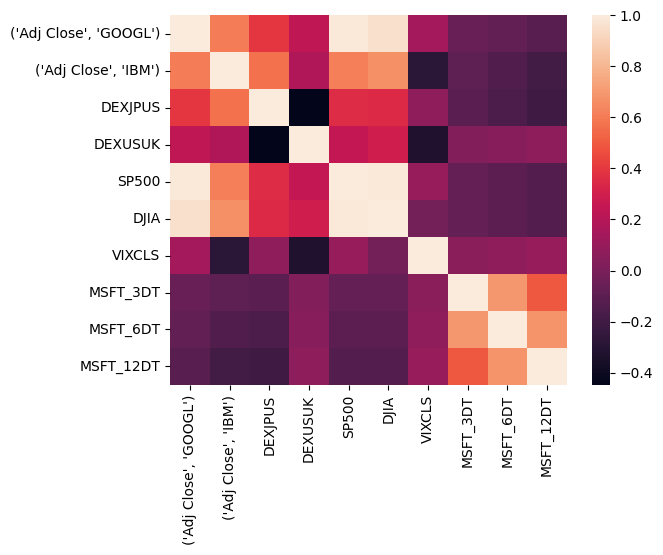

In [31]:
data_corr = X_dataset.corr()
sns.heatmap(data_corr)

In [32]:
lower = pd.DataFrame(np.tril(data_corr, -1),columns = X_dataset.columns)
lower

,"(Adj Close, GOOGL)","(Adj Close, IBM)",DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.604007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.390893,0.565236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.236065,0.180149,-0.448241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.985318,0.612283,0.357785,0.245425,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.960366,0.664108,0.346128,0.295851,0.986139,0.000000,0.000000,0.000000,0.000000,0.0
6,0.143314,-0.284525,0.077215,-0.329242,0.096851,-0.022844,0.000000,0.000000,0.000000,0.0
7,-0.061617,-0.096477,-0.108034,0.032481,-0.070049,-0.071478,0.053292,0.000000,0.000000,0.0
8,-0.085775,-0.146427,-0.156296,0.049281,-0.099507,-0.101736,0.074281,0.688898,0.000000,0.0
9,-0.113978,-0.190502,-0.210173,0.070152,-0.133898,-0.134953,0.100423,0.493384,0.682819,0.0


In [33]:
#remove ถ้า >0.9
to_drop = [column for column in lower if any(lower[column] > 0.9)]
X_dataset.drop(to_drop, inplace=True, axis=1)
X_dataset

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
0,-0.336530,0.004572,0.199625,-1.422524,-1.221596,0.124559,0.053767,0.065021
1,-0.397706,0.028951,0.191501,-1.412192,-1.248116,0.129454,0.073892,0.488648
2,-0.438727,0.032608,0.133005,-1.419996,-1.241198,0.005474,0.097559,0.435261
3,-0.433859,-0.021025,0.344241,-1.412478,-1.275789,-0.051614,0.056135,0.342271
4,-0.452628,-0.047842,0.313368,-1.391612,-1.241198,-0.028775,0.040748,0.328495
...,...,...,...,...,...,...,...,...
1225,0.914740,3.834457,-2.632567,0.567897,0.645171,-0.579830,-1.042200,-0.572835
1226,1.078924,3.769854,-2.718687,0.533773,0.648630,-1.076319,-1.020786,0.231706
1227,1.121355,3.806422,-2.744685,0.582061,0.586366,-0.685724,-1.124078,0.281188
1228,0.989454,3.842990,-2.741435,0.505331,0.747791,-0.857584,-0.276311,0.250033


### Train/Test

In [34]:
#np.floor
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_dataset,Y_dataset,test_size = 0.3, train_size= 0.7, random_state=0)
# Test_size = int(np.floor(0.3 * len(X_dataset)))
# Train_size = int(np.floor(0.7 * len(X_dataset)))
# X_train, X_test = X_dataset[0:Train_size], X_dataset[Train_size:len(X_dataset)]
# Y_train, Y_test = Y_dataset[0:Train_size], Y_dataset[Train_size:len(X_dataset)]

In [35]:
X_test

,"(Adj Close, IBM)",DEXJPUS,DEXUSUK,DJIA,VIXCLS,MSFT_3DT,MSFT_6DT,MSFT_12DT
18,-0.122407,0.260548,-0.040859,-1.249088,-1.329981,-0.002677,-0.127334,-0.147617
342,-0.325216,-0.027120,0.211000,-0.640264,-0.819186,-0.201825,-0.066013,0.305005
467,-0.568755,-0.762136,-1.371648,-0.637870,-0.152731,0.009778,0.330797,-0.079102
1205,2.049273,2.838590,-1.725876,1.306796,-0.089314,-2.426908,-1.673300,-3.378650
858,0.483806,-0.290409,1.138815,1.108773,0.007541,1.147688,1.721168,2.047624
...,...,...,...,...,...,...,...,...
397,-0.508972,-0.262374,-0.607948,-0.725064,-0.503254,-0.077912,-0.258620,-0.005679
629,-1.229660,-0.543947,-1.175036,-1.254946,2.387409,-0.344420,0.285427,1.224700
793,-0.473402,-1.068088,0.657846,0.376283,0.103243,0.344434,0.587577,-0.174742
272,-1.593548,0.202039,-0.185475,-0.649326,-0.382185,-0.759762,-0.644484,0.030291


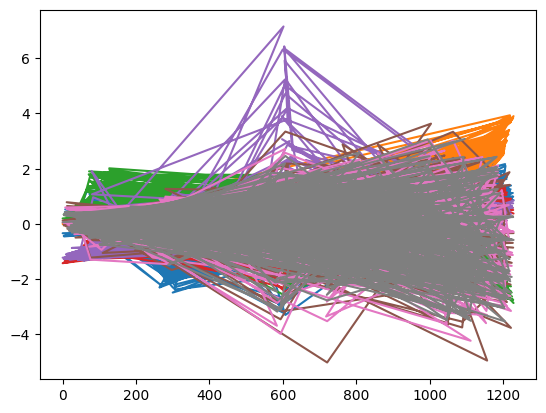

In [36]:
plt.plot(X_train)

### Model Traning

In [37]:
num_fold = 3
seed = 101
kfold = model_selection.KFold(n_splits=num_fold, shuffle = True, random_state=seed)
kfold

KFold(n_splits=3, random_state=101, shuffle=True)

In [38]:
Model_LM = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
#[0.1, 1, 10, 100]
c_val = 1
svr_lin = SVR(kernel='linear', C=c_val)
svr_rbf = SVR(kernel='rbf', C=c_val, gamma=0.01)
svr_poly = SVR(kernel='poly', C=c_val, degree=2)

### Model Training and Cross Validation

In [40]:
#Calculate accuracy score for each mode
score_LM = model_selection.cross_val_score(Model_LM, X_train, Y_train, cv=kfold)
score_lin = model_selection.cross_val_score(svr_lin, X_train, Y_train, cv=kfold)
score_rbf = model_selection.cross_val_score(svr_rbf, X_train, Y_train, cv=kfold)
score_poly = model_selection.cross_val_score(svr_poly, X_train, Y_train, cv=kfold)

c:\Users\Cherry Labtop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\Users\Cherry Labtop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Cherry Labtop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2

In [41]:
# View score k-fold
score = pd.DataFrame({'Linear Model':score_LM,'SVR_linear':score_lin, 'SVR_rbf': score_rbf, 'SVR_poly': 
score_poly})
score_mean = pd.DataFrame({'AVG Linear Model':[score_LM.mean()],'AVG SVR_linear':[score_lin.mean()], 
'AVG SVR_rbf': [score_rbf.mean()], 'AVG SVC_poly': [score_poly.mean()]})

   Linear Model  SVR_linear   SVR_rbf  SVR_poly
0      0.957005    0.949867  0.250964  0.310924
1      0.955648    0.946103  0.239234  0.389251
2      0.963776    0.963037  0.187930  0.267435
   AVG Linear Model  AVG SVR_linear  AVG SVR_rbf  AVG SVC_poly
0           0.95881        0.953002     0.226043      0.322537


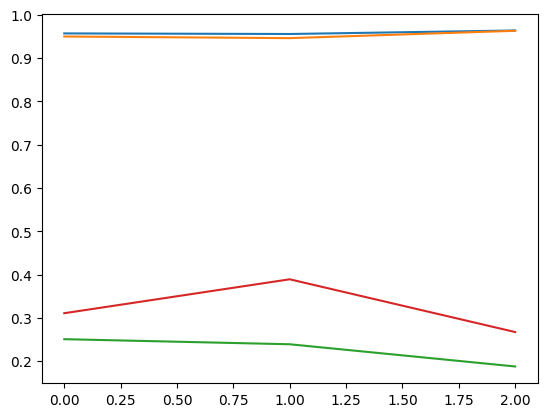

In [42]:
print(score)
print(score_mean)
plt.plot(score)

### Prediction

In [43]:
#Predict all models ( LM, SVR_linear, SVR_rbf, SVR Poly 
LM_pred = Model_LM.fit(X_train, Y_train).predict(X_test)
SVR_linear = svr_lin.fit(X_train, Y_train).predict(X_test)
SVR_rbf = svr_rbf.fit(X_train, Y_train).predict(X_test)
SVR_poly = svr_poly.fit(X_train, Y_train).predict(X_test)

c:\Users\Cherry Labtop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\Users\Cherry Labtop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\Cherry Labtop\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2

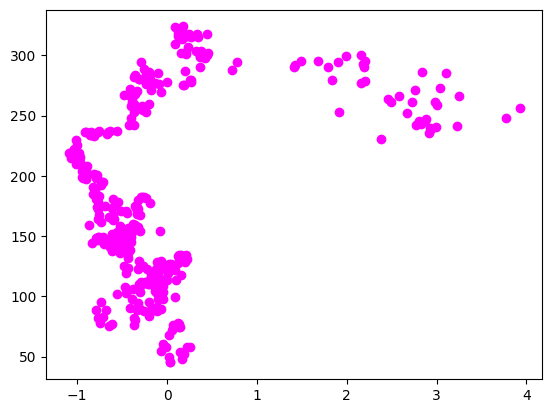

In [44]:
plt.scatter(X_test['DEXJPUS'], LM_pred,c='magenta')

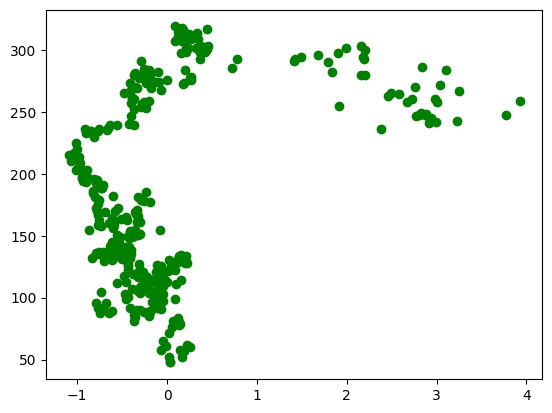

In [45]:
plt.scatter(X_test['DEXJPUS'], SVR_linear,c='green')

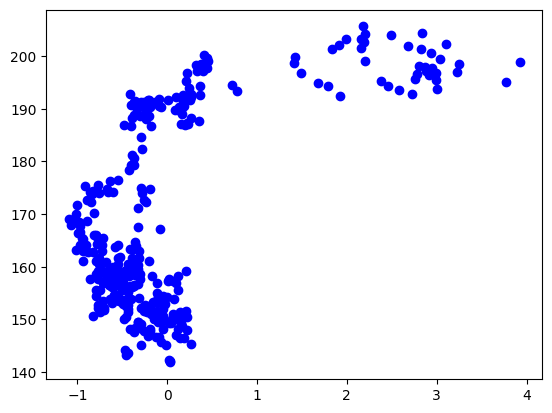

In [46]:
plt.scatter(X_test['DEXJPUS'], SVR_rbf,c='blue')

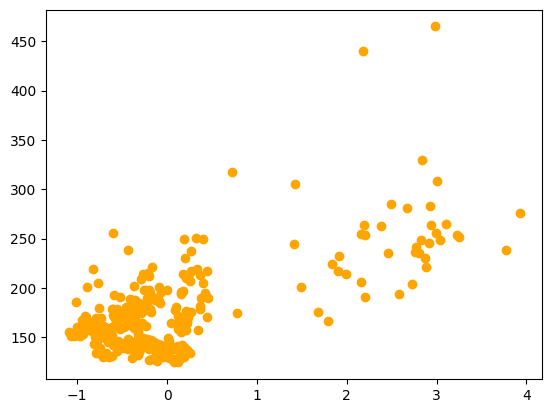

In [47]:
plt.scatter(X_test['DEXJPUS'], SVR_poly,c='orange')

In [48]:
#Model prediction performance evaluation for all model ( LM, SVR_linear, SVR_rbf, SVR Poly )
#MSE LM_prd
LM_MSE = metrics.mean_squared_error(Y_test, LM_pred)
#MSE SVR_Linear
SVR_Linear_MSE = metrics.mean_squared_error(Y_test,SVR_linear)
#MSE SVR_rbf
SVR_RBF_MSE = metrics.mean_squared_error(Y_test,SVR_rbf)
#MSE SVR_Poly
SVR_Poly_MSE = metrics.mean_squared_error(Y_test,SVR_poly)

In [49]:
#R2 LM_prd
LM_R2 = metrics.r2_score(Y_test, LM_pred)
#R2 SVR_Linear
SVR_Linear_R2 = metrics.r2_score(Y_test,SVR_linear)
#R2 SVR_rbf
SVR_RBF_R2 = metrics.r2_score(Y_test,SVR_rbf)
#R2 SVR_Poly
SVR_Poly_R2 = metrics.r2_score(Y_test,SVR_poly)

In [50]:
mse = {LM_MSE,SVR_Linear_MSE,SVR_RBF_MSE,SVR_Poly_MSE}
r2 = {LM_R2,SVR_Linear_R2,SVR_RBF_R2,SVR_Poly_R2}
print("mse =",mse)
print("r2 =",r2)

mse = {4130.212360287923, 4059.3767559969333, 253.04449364685541, 278.5916681905957}
r2 = {0.9583194067854415, 0.9541113666317402, 0.319686040988697, 0.33135383096906534}


<BarContainer object of 4 artists>

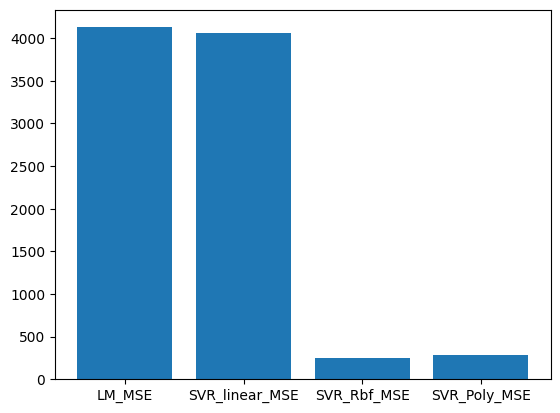

In [51]:
plt.bar(["LM_MSE","SVR_linear_MSE","SVR_Rbf_MSE","SVR_Poly_MSE"],mse)

<BarContainer object of 4 artists>

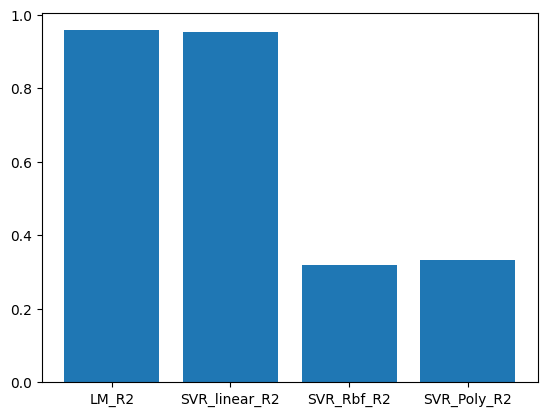

In [52]:
plt.bar(["LM_R2","SVR_linear_R2","SVR_Rbf_R2","SVR_Poly_R2"],r2)